In [21]:
import importlib
import ldsc_72 as ld
import numpy as np
import pandas as pd
import h5py
from numba import jit, njit, prange, vectorize
from helperfuncs import *
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import seaborn as sns

importlib.reload(ld)

<module 'ldsc_72' from 'C:\\Users\\Hariharan\\Documents\\git_repos\\SNIPar\\ldsc_reg\\ldsc_72.py'>

In [22]:
np.random.seed(123)

N = 100
S_size = int(N/2)
S = np.array([np.array([[.5, 0], [0, .8]]),
    np.array([[0.5, 0], [0, 0.8]])] * S_size )
V = np.identity(2) * 0.5

In [23]:
model = ld.sibreg(S = S)
model.simdata(V, N, simr = True)
model.solve(est_init = np.zeros((2, 2)))

Warning there is no value for theta. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for r given. Generating a vector of ones for r
Simulated LD scores!
Effect Vectors Simulated!


(array([[ 0.43715006, -0.03644606],
        [-0.03644606,  0.32132218]]),       fun: 343.30139986869216
  hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
       jac: array([-0.00904331, -0.00322413,  0.02046982])
   message: b'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
      nfev: 31
       nit: 11
    status: 0
   success: True
         x: array([43.71500593, -3.64460577, 32.13221766]))

In [24]:
V00 = np.linspace(0, 3, 100)
V11 = np.linspace(0, 3, 100)

logll_mat = np.empty((N, N))

for v00idx, v00 in enumerate(V00):
    for v11idx, v11 in enumerate(V11):
        Vin = np.array([[v00, -0.03692646],
                       [-0.03692646, v11]])
        Vin = extract_upper_triangle(Vin) * N
        logll_mat[v00idx, v11idx] = -model.neg_logll_grad(Vin)[0]

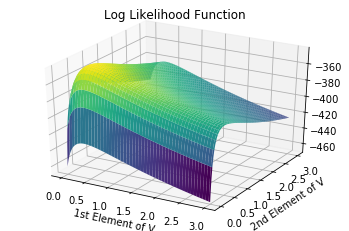

In [25]:
X, Y = np.meshgrid(V00, V11)
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, logll_mat, cmap='viridis')
ax.set_xlabel("1st Element of V")
ax.set_ylabel("2nd Element of V")
ax.set_title("Log Likelihood Function")
plt.savefig("figures/V-unscaled.pdf")

In [26]:
np.random.seed(123)

N = 100
S_size = int(N/2)
S = np.array([np.array([[.5, 0], [0, .8]]),
    np.array([[0.9, 0], [0, 0.8]])] * S_size )
V = np.identity(2) * 0.5/N

model = ld.sibreg(S = S)
model.simdata(V, N, simr = True)

V00 = np.linspace(-4, 1, 100)
V11 = np.linspace(-4, 1, 100)

logll_mat = np.empty((N, N))

for v00idx, v00 in enumerate(V00):
    for v11idx, v11 in enumerate(V11):
        Vin = np.array([[v00, 0.],
                       [0., v11]])
        Vin = extract_upper_triangle(Vin)
        logll_mat[v00idx, v11idx] = -model.neg_logll_grad(Vin)[0]

Warning there is no value for theta. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for r given. Generating a vector of ones for r
Simulated LD scores!
Effect Vectors Simulated!


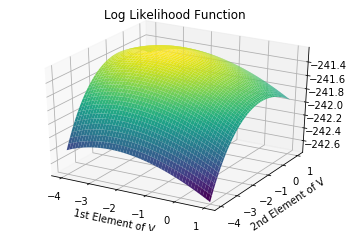

In [27]:
X, Y = np.meshgrid(V00, V11)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, logll_mat, cmap='viridis')
ax.set_xlabel("1st Element of V")
ax.set_ylabel("2nd Element of V")
ax.set_title("Log Likelihood Function")
plt.savefig("figures/V-scaled.pdf")

In [28]:
np.random.seed(123)

N = 100
S_size = int(N/2)
S = np.array([np.array([[5, 0], [0, 5]]),
    np.array([[5, 0], [0, 5]])] * S_size )
V = np.identity(2) * 5

model = ld.sibreg(S = S)
model.simdata(V, N, simr = True)

V00 = np.linspace(2.5, 7.5, 100)
V11 = np.linspace(2.5, 7.5, 100)

logll_mat = np.empty((N, N))

for v00idx, v00 in enumerate(V00):
    for v11idx, v11 in enumerate(V11):
        Vin = np.array([[v00, 0.],
                       [0., v11]])
        Vin = extract_upper_triangle(Vin) * N
        logll_mat[v00idx, v11idx] = -model.neg_logll_grad(Vin)[0]

Warning there is no value for theta. Maybe consider simulating it
No value for U given. Generating a vector of ones (all SNPs weighted equally)
No value for r given. Generating a vector of ones for r
Simulated LD scores!
Effect Vectors Simulated!


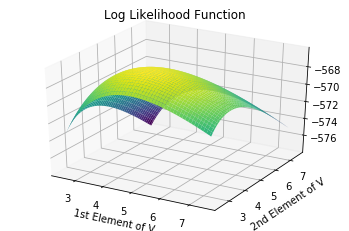

In [29]:
X, Y = np.meshgrid(V00, V11)

fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X, Y, logll_mat, cmap='viridis')
ax.set_xlabel("1st Element of V")
ax.set_ylabel("2nd Element of V")
ax.set_title("Log Likelihood Function")
plt.savefig("figures/V-big.pdf")